In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Definisco le funzioni

In [190]:
def numerov(k2, h, ya, yb, direction='forward'):
    """
    Algoritmo di numerov
    """
    
    M=len(k2)
    y=np.zeros(M)
    
    # FORWARD NUMEROV ALGORYTM
    if direction=='forward':
        #initial conditions
        y[0]=ya
        y[1]=yb
        #algorytm
        for i in range(1,M-1):
            if y[i]< abs(np.inf):
                y[i+1] = (y[i] * (2- 5*h**2/6 * k2[i]) - y[i-1] * (1 + h**2/12 * k2[i-1]) ) / (1 + h**2/12 * k2[i+1])
            else:
                y[i+1]=y[i]
                
    # BACKWORD NUMEROV ALGORYTM
    if direction=='backward':
        y=np.zeros(M)
        #initial conditions
        y[M-1]=ya
        y[M-2]=yb
        #algorytm
        for i in range(M-2,0,-1):
            if y[i]< abs(np.inf):
                y[i-1] = (y[i] * (2- 5*h**2/6 * k2[i]) - y[i+1] * (1 + h**2/12 * k2[i+1]) ) / (1 + h**2/12 * k2[i-1])
            else:
                y[i-1]=y[i]
    return y

In [125]:
def root_finder(f, begin, end, step, tol):
    """
    find roots of a function
    """
    # coarse find of roots
    E=np.arange(begin,end,step)
    yM=f(E)
    
    root_bound=[]
    for i in range(1,len(E)):
        if np.sign(yM[i]) != np.sign(yM[i-1]):
            root_bound.append([i-1,i])

    # finer find of roots
    roots=[]
    for k in root_bound:
        E_p=E[k[1]]
        E_m=E[k[0]]
        n_iter=0
        while (abs((E_p-E_m)/(E_p+E_m)*2)>tol)&(n_iter<10):
            E_temp=(E_p+E_m)/2
            if np.sign(f(E_m)) != np.sign(f(E_temp)):
                E_p = E_temp
            if np.sign(f(E_temp)) != np.sign(f(E_p)):
                E_m = E_temp
            n_iter=n_iter+1
        roots.append([(E_p+E_m)/2, E_p-E_m])

    return roots

# Esercizio punto 1

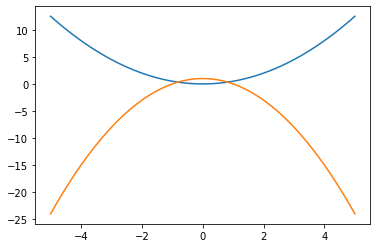

In [234]:
# MASH
h=0.001
x=np.arange(-5,5,h)
M=len(x)

# POTENTIAL

V=lambda x : x**2/2

k2 = lambda E : 2 * (E - V(x))

plt.plot(x,V(x))
plt.plot(x,k2(0.5))


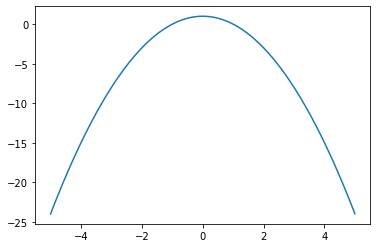

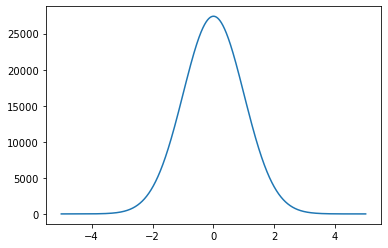

In [230]:
y=numerov(k2(0.5),h,0,h)
plt.plot(x,y)

In [232]:
# dobbiamo creare una funzione dell'energia y_M(E)
f = np.vectorize(lambda E : (numerov(k2(E),h,0,h)[M-1]))


In [115]:
%%time
import time
time.time()

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 18.6 µs


1646824614.8654995